# <font style="color:rgb(50,120,229)">Objective </font>
You have seen how we convert from one color space to another and also the theory behind the color spaces. In this assignment, you will implement the function cvtColor using the conversion formulae given in the opencv website. Specifically, you will be implementing the 2 functions:
1. convertBGRtoGray ( 10 points )
1. convertBGRtoHSV ( 20 points )

We have created the outline of the functions along with the supporting code. You just have to implement the formula in the function.

**Parameters**

**Input**
- BGR image ( named img )

**Output**
- Gray or HSV image

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import cv2
from dataPath import DATA_PATH
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18.0, 12.0)
matplotlib.rcParams['image.interpolation'] = 'bilinear'

In [3]:
# Supress warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
img = cv2.imread(DATA_PATH+"images/sample.jpg")

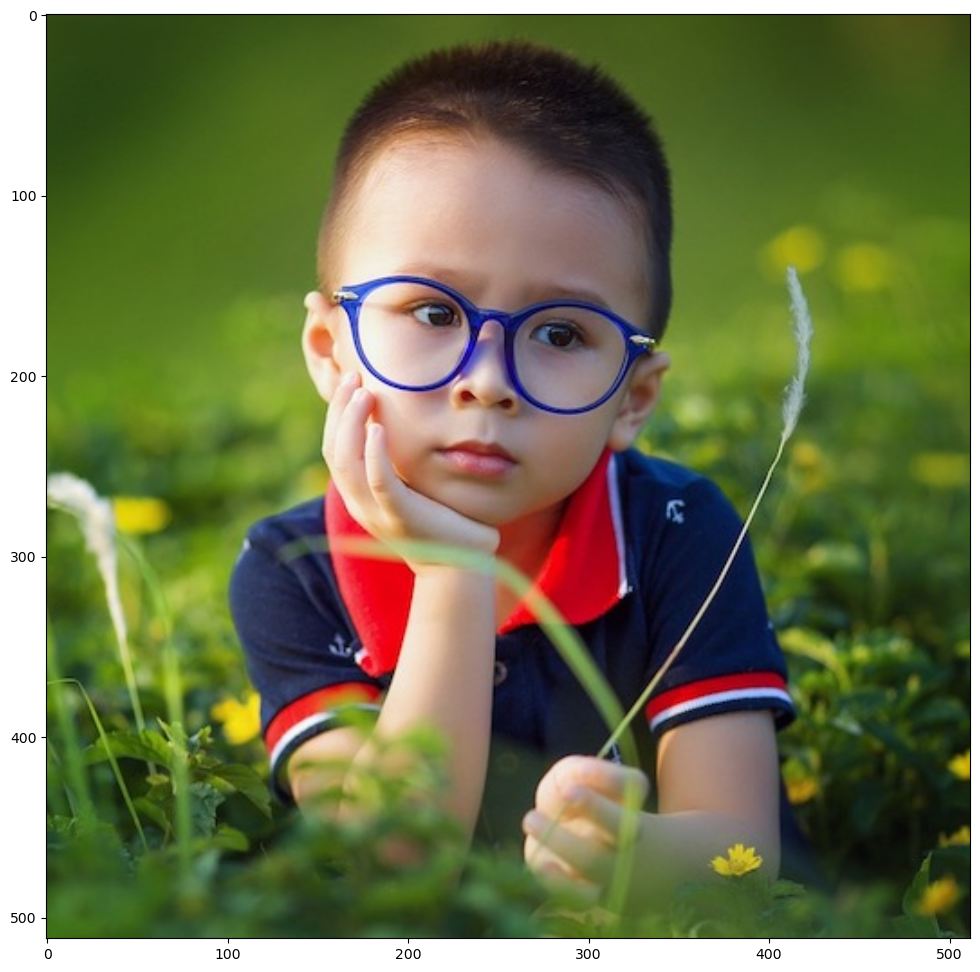

In [5]:
plt.imshow(img[:,:,::-1])
plt.show()

#### <font style="color:rgb(50,120,229)">Convert BGR image to Grayscale image</font>
- Input: image in BGR mode
- Output: image in grayscale mode

For your convenience, we have added the conversion formula below
![BGR to Gray formula](https://www.dropbox.com/s/2zuuigf5cpocs75/bgr2gray_formula.png?dl=1)

#### Reference: 
https://docs.opencv.org/4.1.0/de/d25/imgproc_color_conversions.html


In [6]:
def convertBGRtoGray(image):
    """
    Convert a BGR image to a grayscale image.

    Parameters:
    image (numpy.ndarray): Input image in BGR format.

    Returns:
    numpy.ndarray: Grayscale image.
    """
    # Extract the B, G, R channels
    B = image[:, :, 0]
    G = image[:, :, 1]
    R = image[:, :, 2]
    
    # Calculate the grayscale values using the formula
    # Gray = 0.299*R + 0.587*G + 0.114*B
    gray_image = 0.299 * R + 0.587 * G + 0.114 * B
    
    # Convert to uint8 type
    gray_image = gray_image.astype(np.uint8)
    
    return gray_image

In [7]:
gray = convertBGRtoGray(img)

Get the result from OpenCV's `cvtColor` function to verify

In [8]:
gray_cv = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

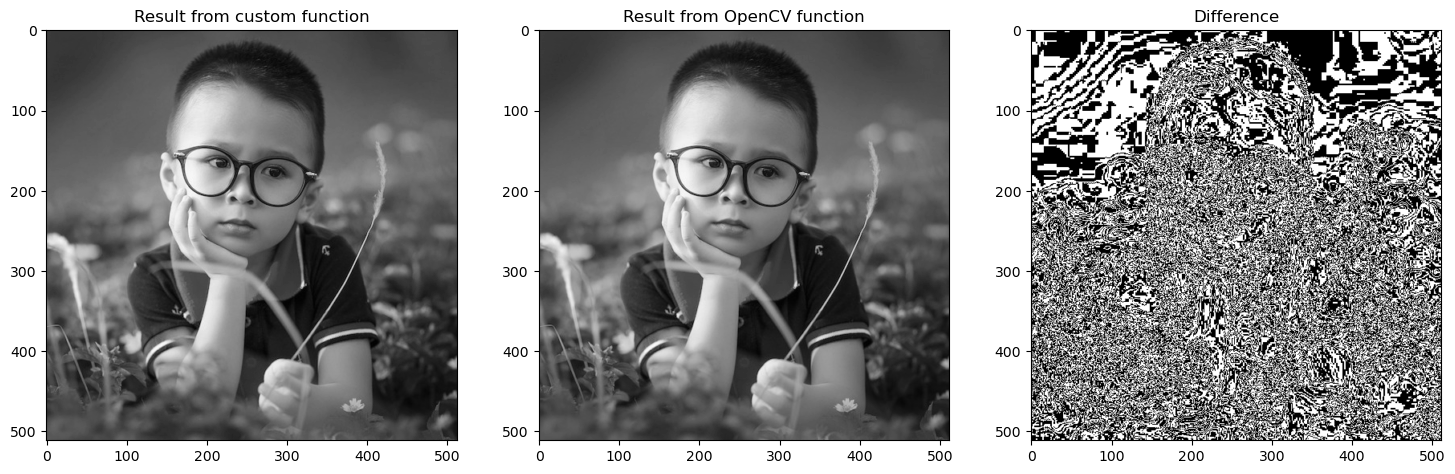

In [9]:
plt.figure(figsize=(18,12))
plt.subplot(1,3,1)
plt.title("Result from custom function")
plt.imshow(gray,cmap="gray")
plt.subplot(1,3,2)
plt.title("Result from OpenCV function")
plt.imshow(gray_cv,cmap="gray")
plt.subplot(1,3,3)
plt.title("Difference")
plt.imshow(np.abs(gray-gray_cv),cmap="gray")
plt.show()

In [10]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### <font style="color:rgb(50,120,229)">Convert BGR image to HSV image</font>
- Input: image in BGR mode
- Output: image in HSV mode

For your convenience, we have added the conversion formula below
![BGR to HSV formula](https://www.dropbox.com/s/btdrk2qxd9knav1/bgr2hsv_formula.png?dl=1)

#### Reference: 
https://docs.opencv.org/4.1.0/de/d25/imgproc_color_conversions.html

You can assume we are working with 8 bit images.

In [18]:
def convertBGRtoHSV(image):
    """
    Convert a BGR image to an HSV image.

    Parameters:
    image (numpy.ndarray): Input image in BGR format.

    Returns:
    numpy.ndarray: HSV image.
    """
    # Extract the B, G, R channels
    B = image[:, :, 0] / 255.0
    G = image[:, :, 1] / 255.0
    R = image[:, :, 2] / 255.0
    
    # Calculate the maximum and minimum values among R, G, B
    Cmax = np.max([R, G, B], axis=0)
    Cmin = np.min([R, G, B], axis=0)
    delta = Cmax - Cmin
    
    # Initialize H, S, V channels
    H = np.zeros_like(Cmax)
    S = np.zeros_like(Cmax)
    V = Cmax
    
    # Calculate Hue
    mask = (delta != 0)
    H[mask & (Cmax == R)] = (60 * ((G - B) / delta) % 6)[mask & (Cmax == R)]
    H[mask & (Cmax == G)] = (60 * ((B - R) / delta) + 2 * 60)[mask & (Cmax == G)]
    H[mask & (Cmax == B)] = (60 * ((R - G) / delta) + 4 * 60)[mask & (Cmax == B)]
    
    # Calculate Saturation
    S[Cmax != 0] = (delta / Cmax)[Cmax != 0]
    
    # Scale H to [0, 179], S and V to [0, 255]
    H = (H / 2).astype(np.uint8)
    S = (S * 255).astype(np.uint8)
    V = (V * 255).astype(np.uint8)
    
    # Stack H, S, V channels to get the HSV image
    hsv_image = np.stack([H, S, V], axis=-1)
    
    return hsv_image

In [12]:
hsv = convertBGRtoHSV(img)

Get the result from OpenCV's `cvtColor` function to verify

In [13]:
hsv_cv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

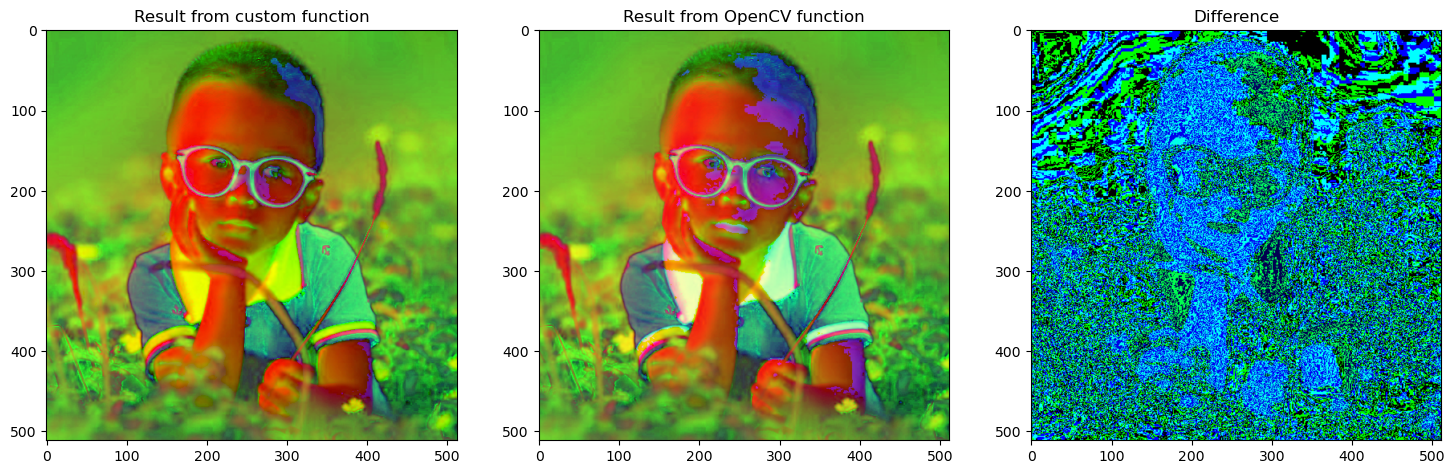

In [14]:
plt.subplot(1,3,1)
plt.title("Result from custom function")
plt.imshow(hsv[:,:,::-1])
plt.subplot(1,3,2)
plt.title("Result from OpenCV function")
plt.imshow(hsv_cv[:,:,::-1])
plt.subplot(1,3,3)
plt.title("Difference")
plt.imshow(np.abs(hsv-hsv_cv)[:,:,::-1])
plt.show()

In [15]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
